
#Deep Learning con Python



### Autor: Erwing FC 

#### ~erwingforerocastro@gmail.com 

In [0]:
#importar las librerias
%tensorflow_version 2.x 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical  
from tensorflow import keras 
from tensorflow.keras import layers 

print(tf.__version__) 

2.2.0


In [0]:
#cargamos los datos
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 


In [0]:
#creamos los valores de los labels ya que no se incluyen (0 a 9)
#train_labels y test_labels tienen valores de 0 a 9 es un vector de 60000 valores y 10000 valores respectivamente
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',  'Ankle boot']

In [0]:
#convertimos los valores y minimizamos
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images = train_images / 255.0 
test_images = test_images / 255.0

#comprobamos que sea lo esperado
print("train_images.shape:",train_images.shape) 
print("len(train_labels:",len(train_labels)) 
print("test_images.shape:",test_images.shape) 
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


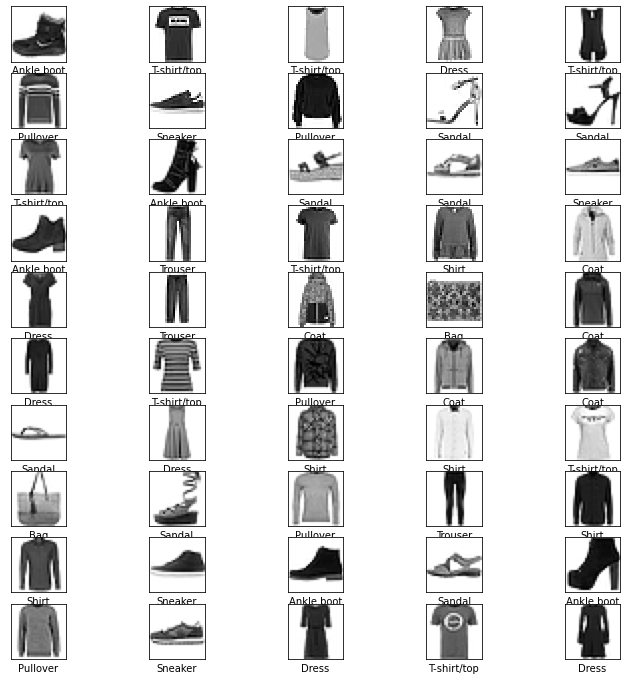

In [0]:
#mostramos las imagenes de entrenamiento con su etiqueta (primeras 50)
plt.figure(figsize=(12,12)) #reescalamos el tamaño para que las imagenes al mostrarse sean de 12x12 
for i in range(50):  
        plt.subplot(10,5,i+1) #numero de plots en un cuadro 10x5 i+1 es el indice 
        plt.xticks([])        #etiquetas en x
        plt.yticks([])        #etiquetas en y
        plt.grid(False)       #cuadricula no
        plt.imshow(train_images[i], cmap=plt.cm.binary)  #insertamos una imagen 
        plt.xlabel(class_names[train_labels[i]])         #texto debajo del eje x
plt.show() 


In [0]:
#definimos el modelo
model = keras.Sequential() 
model.add(layers.Flatten(input_shape=(28, 28)))  #flatten nos facilita convertir cada vector de 28x28 a un vector 1D de 784 elementos
model.add(layers.Dense(10, activation='sigmoid')) 
model.add(layers.Dense(10, activation='softmax')) 

In [0]:
#observamos la estructura del modelo
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
#metodo de compilación 
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', #funcion de coste  
              metrics=['accuracy'])

In [0]:
#entrenamiento
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0081 - accuracy: 0.7211
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5622 - accuracy: 0.8182
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4793 - accuracy: 0.8375
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4435 - accuracy: 0.8473
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4236 - accuracy: 0.8525
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4097 - accuracy: 0.8564
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4010 - accuracy: 0.8598
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3926 - accuracy: 0.8611
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3867 - accuracy: 0.8637
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.380

In [0]:
#evaluación del modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test precisión:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8492
Test precisión: 0.8492000102996826


In [0]:
#predicción usando el modelo
predicciones = model.predict(test_images)
predicciones[5]
label=np.argmax(predicciones[5])
print(class_names[label])
plt.imshow(test_images[5]*255,cmap=plt.cm.binary)
plt.show()

NameError: ignored

In [0]:
def plot_image(i, predictions_array, true_label, img):  
  predictions_array, true_label, img = predictions_array, true_label[i], img[i] #damos los valores de el i o ejemplo en especifico  
  
  plt.grid(False) #cuadricula no
  plt.xticks([])  #etiquetas en la linea x
  plt.yticks([])  #etiquetas en la linea y

  plt.imshow(img, cmap=plt.cm.binary)  #añadimos la imagen a plt
  predicted_label = np.argmax(predictions_array)  #traemos la posicion del valor mas grande de el array predicho
  if predicted_label == true_label:  # si el valor es igual al esperado 
     color = 'blue'  
  else:  
     color = 'red'  
  #mensaje debajo del eje x:                 nombre_encontrado -               valor por 100 -            nombre_verdadero -      color
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):  
   true_label =  true_label[i]  
   plt.grid(False)  #cuadricula no
   plt.xticks(range(10))  #valores en la linea x
   plt.yticks([])         #valores en la linea y

   thisplot = plt.bar(range(10), predictions_array, color="#007700")  #insertamos 10 barras con los valores del array predicho
   plt.ylim([0, 1])                                                   #limite en y de 0 hasta maximo 1
   predicted_label = np.argmax(predictions_array)                     #pocision con el valor maximo

   thisplot[predicted_label].set_color('red')  #le damos al label predicho con un color rojo
   thisplot[true_label].set_color('black')     #le damos al label verdadero con un color negro


#Las etiquetas de predicción correcta las pintaremos de negro (para que se pueda ver en la edición en blanco y negro) 
#y las etiquetas de predicción incorrecta las colorearemos de rojo (gris en la edición en blanco y negro). 
#El número da el porcentaje (de 100) para la etiqueta predicha.

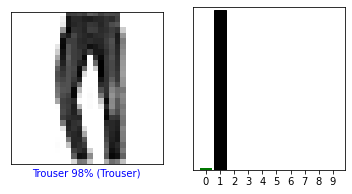

In [0]:
i = 5
plt.figure(figsize=(6,3)) #reescalamos el tamaño para que las imagenes al mostrarse sean de 6x3
plt.subplot(1,2,1)        #(fila,columna,indice)
plot_image(i, predicciones[i], test_labels, test_images) 
plt.subplot(1,2,2)        #(fila,columna,indice)
plot_value_array(i, predicciones[i], test_labels) 
plt.show()

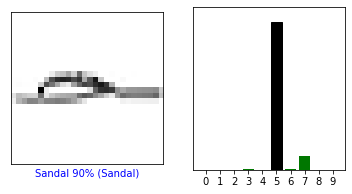

In [0]:
i = 8
plt.figure(figsize=(6,3)) #reescalamos el tamaño para que las imagenes al mostrarse sean de 6x3
plt.subplot(1,2,1)        #(fila,columna,indice)
plot_image(i, predicciones[i], test_labels, test_images) 
plt.subplot(1,2,2)        #(fila,columna,indice)
plot_value_array(i, predicciones[i], test_labels) 
plt.show()

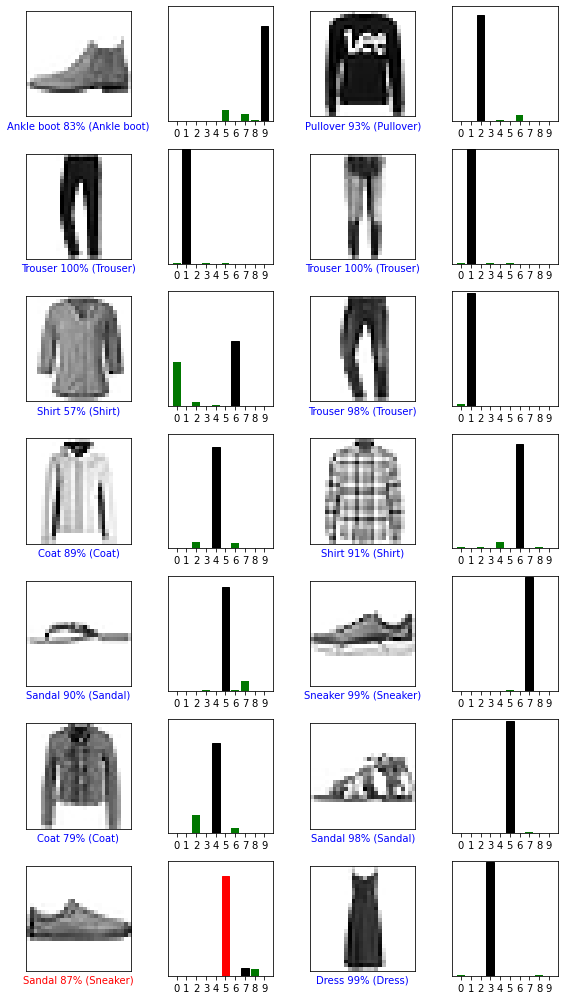

In [0]:
num_rows = 7 
num_cols = 2 
num_images = num_rows*num_cols #14 imagenes
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #tamaño del plt es 8*14
for i in range(num_images):  #itera 14 veces
  plt.subplot(num_rows, 2*num_cols, 2*i+1)  #añade un subplot de (7,4,indice) indice 3,5,7,9... 
  plot_image(i, predicciones[i], test_labels, test_images)  #llamamos la funcion plot_image
  plt.subplot(num_rows, 2*num_cols, 2*i+2)  #añade un subplot de (7,4,indice) indice 4,6,8,10... 
  plot_value_array(i, predicciones[i], test_labels)         #llamamos la funcion plot_value_array
  
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama para proporcionar el relleno especificado
plt.show()